In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
#read in the CSV as a dataframe 
df = pd.read_csv('modified_fifa_data.csv', index_col = 0)
# drop NAs and set Value_Euro as a interger 
df.dropna
df['Value_Euro'].fillna(0).astype(int)
df.head()

,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,FW,Argentina,94,94,110500000.0,5,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
190460,C. Eriksen,27,154.94,76.2,MF,Denmark,88,89,69500000.0,3,...,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,"CAM,RM,CM"
195864,P. Pogba,25,190.50,83.9,MF,France,88,91,73000000.0,4,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,"CM,CAM"
198219,L. Insigne,27,162.56,59.0,MF,Italy,88,88,62000000.0,3,...,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,"LW,ST"
201024,K. Koulibaly,27,187.96,88.9,DF,Senegal,88,91,60000000.0,3,...,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,CB


,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,FW,Argentina,94,94,110500000.0,5,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
190460,C. Eriksen,27,154.94,76.2,MF,Denmark,88,89,69500000.0,3,...,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,"CAM,RM,CM"
195864,P. Pogba,25,190.50,83.9,MF,France,88,91,73000000.0,4,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,"CM,CAM"
198219,L. Insigne,27,162.56,59.0,MF,Italy,88,88,62000000.0,3,...,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,"LW,ST"
201024,K. Koulibaly,27,187.96,88.9,DF,Senegal,88,91,60000000.0,3,...,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,CB


In [4]:
age_df = df['Age']
age_df

Id
158023    31
190460    27
195864    25
198219    27
201024    27
          ..
204322    25
239762    23
235155    22
244883    21
247187    19
Name: Age, Length: 17954, dtype: int64

Id
158023    31
190460    27
195864    25
198219    27
201024    27
          ..
204322    25
239762    23
235155    22
244883    21
247187    19
Name: Age, Length: 17954, dtype: int64

In [5]:
df = df[df['Value_Euro']!=1000]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17954 entries, 158023 to 247187
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          17954 non-null  object 
 1   Age                           17954 non-null  int64  
 2   Height_Cm                     17954 non-null  float64
 3   Weight_Kgs                    17954 non-null  float64
 4   Positions                     17954 non-null  object 
 5   Nationality                   17954 non-null  object 
 6   Overall_Rating                17954 non-null  int64  
 7   Potential                     17954 non-null  int64  
 8   Value_Euro                    17699 non-null  float64
 9   International_Reputation_1_5  17954 non-null  int64  
 10  Skill_Moves_1_5               17954 non-null  int64  
 11  Work_Rate                     17954 non-null  object 
 12  Club_Team                     17940 non-null  object 


In [6]:
#create dataframes for use later
new_df = df.copy()
new_df.drop(['Overall_Rating','Potential','Work_Rate'],axis=1,inplace=True)
new_df.head()

,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Club_Team,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,FW,Argentina,110500000.0,5,4,FC Barcelona,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
190460,C. Eriksen,27,154.94,76.2,MF,Denmark,69500000.0,3,4,Tottenham Hotspur,...,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,"CAM,RM,CM"
195864,P. Pogba,25,190.50,83.9,MF,France,73000000.0,4,5,Manchester United,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,"CM,CAM"
198219,L. Insigne,27,162.56,59.0,MF,Italy,62000000.0,3,4,Napoli,...,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,"LW,ST"
201024,K. Koulibaly,27,187.96,88.9,DF,Senegal,60000000.0,3,2,Napoli,...,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,CB


,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Club_Team,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,FW,Argentina,110500000.0,5,4,FC Barcelona,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
190460,C. Eriksen,27,154.94,76.2,MF,Denmark,69500000.0,3,4,Tottenham Hotspur,...,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,"CAM,RM,CM"
195864,P. Pogba,25,190.50,83.9,MF,France,73000000.0,4,5,Manchester United,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,"CM,CAM"
198219,L. Insigne,27,162.56,59.0,MF,Italy,62000000.0,3,4,Napoli,...,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,"LW,ST"
201024,K. Koulibaly,27,187.96,88.9,DF,Senegal,60000000.0,3,2,Napoli,...,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,CB


In [7]:
#drop coloums that are not rationals
prep_df = df.copy()
prep_df.drop(['Age','Height_Cm','Weight_Kgs','Positions','Nationality','International_Reputation_1_5','Skill_Moves_1_5','Club_Team','National_Team','Ls','St','Rs','Lw','Lf','Cf','Rf','Rw','Lam','Cam','Ram','Lm','Lcm','Cm','Rcm','Rm','Lwb','Ldm','Cdm','Rdm','Rwb','Lb','Lcb','Cb','Rcb','Rb',],axis=1,inplace=True)
prep_df

,Name,Overall_Rating,Potential,Value_Euro,Work_Rate,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,...,Composure,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,94,94,110500000.0,Medium/ Low,86,95,70,92,86,...,96,33,28,26,6,11,15,14,8,"CF,RW,ST"
190460,C. Eriksen,88,89,69500000.0,High/ Medium,88,81,52,91,80,...,88,59,57,22,9,14,7,7,6,"CAM,RM,CM"
195864,P. Pogba,88,91,73000000.0,High/ Medium,80,75,75,86,85,...,87,63,67,67,5,6,2,4,3,"CM,CAM"
198219,L. Insigne,88,88,62000000.0,High/ Medium,86,77,56,85,74,...,83,51,24,22,8,4,14,9,10,"LW,ST"
201024,K. Koulibaly,88,91,60000000.0,High/ High,30,22,83,68,14,...,80,91,88,87,7,11,7,13,5,CB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,R. McKenzie,67,70,975000.0,High/ Medium,57,61,60,66,37,...,56,40,20,18,15,11,15,12,7,"RM,CAM,CM"
239762,M. Sipľak,59,67,190000.0,Medium/ High,50,19,53,55,31,...,52,53,64,60,15,7,7,15,8,LB
235155,J. Bekkema,59,67,170000.0,Medium/ Medium,11,9,13,26,9,...,47,9,12,13,63,57,50,58,63,GK


,Name,Overall_Rating,Potential,Value_Euro,Work_Rate,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,...,Composure,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,94,94,110500000.0,Medium/ Low,86,95,70,92,86,...,96,33,28,26,6,11,15,14,8,"CF,RW,ST"
190460,C. Eriksen,88,89,69500000.0,High/ Medium,88,81,52,91,80,...,88,59,57,22,9,14,7,7,6,"CAM,RM,CM"
195864,P. Pogba,88,91,73000000.0,High/ Medium,80,75,75,86,85,...,87,63,67,67,5,6,2,4,3,"CM,CAM"
198219,L. Insigne,88,88,62000000.0,High/ Medium,86,77,56,85,74,...,83,51,24,22,8,4,14,9,10,"LW,ST"
201024,K. Koulibaly,88,91,60000000.0,High/ High,30,22,83,68,14,...,80,91,88,87,7,11,7,13,5,CB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,R. McKenzie,67,70,975000.0,High/ Medium,57,61,60,66,37,...,56,40,20,18,15,11,15,12,7,"RM,CAM,CM"
239762,M. Sipľak,59,67,190000.0,Medium/ High,50,19,53,55,31,...,52,53,64,60,15,7,7,15,8,LB
235155,J. Bekkema,59,67,170000.0,Medium/ Medium,11,9,13,26,9,...,47,9,12,13,63,57,50,58,63,GK


In [8]:
#double checking for nulls
prep_df.isnull().sum()

Name                   0
Overall_Rating         0
Potential              0
Value_Euro           255
Work_Rate              0
Crossing               0
Finishing              0
Heading_Accuracy       0
Short_Passing          0
Volleys                0
Dribbling              0
Curve                  0
Freekick_Accuracy      0
Long_Passing           0
Ball_Control           0
Acceleration           0
Sprint_Speed           0
Agility                0
Reactions              0
Balance                0
Shot_Power             0
Jumping                0
Stamina                0
Strength               0
Long_Shots             0
Aggression             0
Interceptions          0
Positioning            0
Vision                 0
Penalties              0
Composure              0
Marking                0
Standing_Tackle        0
Sliding_Tackle         0
Gk_Diving              0
Gk_Handling            0
Gk_Kicking             0
Gk_Positioning         0
Gk_Reflexes            0
Original_Position      0


Name                   0
Overall_Rating         0
Potential              0
Value_Euro           255
Work_Rate              0
Crossing               0
Finishing              0
Heading_Accuracy       0
Short_Passing          0
Volleys                0
Dribbling              0
Curve                  0
Freekick_Accuracy      0
Long_Passing           0
Ball_Control           0
Acceleration           0
Sprint_Speed           0
Agility                0
Reactions              0
Balance                0
Shot_Power             0
Jumping                0
Stamina                0
Strength               0
Long_Shots             0
Aggression             0
Interceptions          0
Positioning            0
Vision                 0
Penalties              0
Composure              0
Marking                0
Standing_Tackle        0
Sliding_Tackle         0
Gk_Diving              0
Gk_Handling            0
Gk_Kicking             0
Gk_Positioning         0
Gk_Reflexes            0
Original_Position      0


In [9]:
prep_df = prep_df.dropna()
prep_df.isnull().sum()

Name                 0
Overall_Rating       0
Potential            0
Value_Euro           0
Work_Rate            0
Crossing             0
Finishing            0
Heading_Accuracy     0
Short_Passing        0
Volleys              0
Dribbling            0
Curve                0
Freekick_Accuracy    0
Long_Passing         0
Ball_Control         0
Acceleration         0
Sprint_Speed         0
Agility              0
Reactions            0
Balance              0
Shot_Power           0
Jumping              0
Stamina              0
Strength             0
Long_Shots           0
Aggression           0
Interceptions        0
Positioning          0
Vision               0
Penalties            0
Composure            0
Marking              0
Standing_Tackle      0
Sliding_Tackle       0
Gk_Diving            0
Gk_Handling          0
Gk_Kicking           0
Gk_Positioning       0
Gk_Reflexes          0
Original_Position    0
dtype: int64

Name                 0
Overall_Rating       0
Potential            0
Value_Euro           0
Work_Rate            0
Crossing             0
Finishing            0
Heading_Accuracy     0
Short_Passing        0
Volleys              0
Dribbling            0
Curve                0
Freekick_Accuracy    0
Long_Passing         0
Ball_Control         0
Acceleration         0
Sprint_Speed         0
Agility              0
Reactions            0
Balance              0
Shot_Power           0
Jumping              0
Stamina              0
Strength             0
Long_Shots           0
Aggression           0
Interceptions        0
Positioning          0
Vision               0
Penalties            0
Composure            0
Marking              0
Standing_Tackle      0
Sliding_Tackle       0
Gk_Diving            0
Gk_Handling          0
Gk_Kicking           0
Gk_Positioning       0
Gk_Reflexes          0
Original_Position    0
dtype: int64

In [10]:
#checking the data types
prep_df.dtypes

Name                  object
Overall_Rating         int64
Potential              int64
Value_Euro           float64
Work_Rate             object
Crossing               int64
Finishing              int64
Heading_Accuracy       int64
Short_Passing          int64
Volleys                int64
Dribbling              int64
Curve                  int64
Freekick_Accuracy      int64
Long_Passing           int64
Ball_Control           int64
Acceleration           int64
Sprint_Speed           int64
Agility                int64
Reactions              int64
Balance                int64
Shot_Power             int64
Jumping                int64
Stamina                int64
Strength               int64
Long_Shots             int64
Aggression             int64
Interceptions          int64
Positioning            int64
Vision                 int64
Penalties              int64
Composure              int64
Marking                int64
Standing_Tackle        int64
Sliding_Tackle         int64
Gk_Diving     

Name                  object
Overall_Rating         int64
Potential              int64
Value_Euro           float64
Work_Rate             object
Crossing               int64
Finishing              int64
Heading_Accuracy       int64
Short_Passing          int64
Volleys                int64
Dribbling              int64
Curve                  int64
Freekick_Accuracy      int64
Long_Passing           int64
Ball_Control           int64
Acceleration           int64
Sprint_Speed           int64
Agility                int64
Reactions              int64
Balance                int64
Shot_Power             int64
Jumping                int64
Stamina                int64
Strength               int64
Long_Shots             int64
Aggression             int64
Interceptions          int64
Positioning            int64
Vision                 int64
Penalties              int64
Composure              int64
Marking                int64
Standing_Tackle        int64
Sliding_Tackle         int64
Gk_Diving     

In [11]:
# pass skills and target value through lambda funciton
df_show = prep_df.copy()
df_show['Value_Euro'] = df_show['Value_Euro'].apply(lambda x : "{:,}".format(int(x)))
df_show[['Overall_Rating', 'Potential', 'Crossing', 'Finishing',
          'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick_Accuracy', 'Long_Passing',
          'Ball_Control','Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance',' Shot_Power',
          'Jumping', 'Stamina', 'Strength', 'Long_Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
          'Penalties', 'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle', 'Gk_Diving', 'Gk_Handling',
          'Gk_Kicking', 'Gk_Positioning', 'Gk_Reflexes']] = df_show[['Overall_Rating', 'Potential', 'Crossing',
                  'Finishing', 'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve',
                  'Freekick_Accuracy', 'Long_Passing', 'Ball_Control', 'Acceleration', 'Sprint_Speed','Agility',
                  'Reactions', 'Balance', 'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots', 'Aggression',
                  'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing_Tackle',
                  'Sliding_Tackle', 'Gk_Diving', 'Gk_Handling', 'Gk_Kicking', 'Gk_Positioning', 'Gk_Reflexes']].apply(lambda x: round(x,1))
df_show = df_show.rename(columns={'Value_Euro':'Value_Euro'})
df_show

,Name,Overall_Rating,Potential,Value_Euro,Work_Rate,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,...,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Original_Position,Shot_Power
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,94,94,"110,500,000",Medium/ Low,86,95,70,92,86,...,33,28,26,6,11,15,14,8,"CF,RW,ST",85
190460,C. Eriksen,88,89,"69,500,000",High/ Medium,88,81,52,91,80,...,59,57,22,9,14,7,7,6,"CAM,RM,CM",84
195864,P. Pogba,88,91,"73,000,000",High/ Medium,80,75,75,86,85,...,63,67,67,5,6,2,4,3,"CM,CAM",90
198219,L. Insigne,88,88,"62,000,000",High/ Medium,86,77,56,85,74,...,51,24,22,8,4,14,9,10,"LW,ST",75
201024,K. Koulibaly,88,91,"60,000,000",High/ High,30,22,83,68,14,...,91,88,87,7,11,7,13,5,CB,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,R. McKenzie,67,70,"975,000",High/ Medium,57,61,60,66,37,...,40,20,18,15,11,15,12,7,"RM,CAM,CM",51
239762,M. Sipľak,59,67,"190,000",Medium/ High,50,19,53,55,31,...,53,64,60,15,7,7,15,8,LB,27
235155,J. Bekkema,59,67,"170,000",Medium/ Medium,11,9,13,26,9,...,9,12,13,63,57,50,58,63,GK,17


,Name,Overall_Rating,Potential,Value_Euro,Work_Rate,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,...,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Original_Position,Shot_Power
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,94,94,"110,500,000",Medium/ Low,86,95,70,92,86,...,33,28,26,6,11,15,14,8,"CF,RW,ST",85
190460,C. Eriksen,88,89,"69,500,000",High/ Medium,88,81,52,91,80,...,59,57,22,9,14,7,7,6,"CAM,RM,CM",84
195864,P. Pogba,88,91,"73,000,000",High/ Medium,80,75,75,86,85,...,63,67,67,5,6,2,4,3,"CM,CAM",90
198219,L. Insigne,88,88,"62,000,000",High/ Medium,86,77,56,85,74,...,51,24,22,8,4,14,9,10,"LW,ST",75
201024,K. Koulibaly,88,91,"60,000,000",High/ High,30,22,83,68,14,...,91,88,87,7,11,7,13,5,CB,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,R. McKenzie,67,70,"975,000",High/ Medium,57,61,60,66,37,...,40,20,18,15,11,15,12,7,"RM,CAM,CM",51
239762,M. Sipľak,59,67,"190,000",Medium/ High,50,19,53,55,31,...,53,64,60,15,7,7,15,8,LB,27
235155,J. Bekkema,59,67,"170,000",Medium/ Medium,11,9,13,26,9,...,9,12,13,63,57,50,58,63,GK,17


In [12]:
#passing origonal df through CORR_MATRIX to get Pearson Correlation Coefficient between each pair of its input columns
corr_matrix = df.corr()
corr_matrix

,Age,Height_Cm,Weight_Kgs,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Crossing,Finishing,...,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes
Age,1.000000,0.059579,0.233819,0.461529,-0.259579,0.082360,0.259977,0.029681,0.133357,0.074761,...,0.147924,0.394717,0.146725,0.118362,0.103008,0.100785,0.105334,0.104697,0.115960,0.102587
Height_Cm,0.059579,1.000000,0.495320,0.038080,0.008526,0.011144,0.026850,-0.320141,-0.388805,-0.296794,...,-0.272134,-0.111849,-0.089783,-0.081452,-0.086093,0.295386,0.296296,0.291707,0.296131,0.296989
Weight_Kgs,0.233819,0.495320,1.000000,0.150521,-0.015099,0.044519,0.085086,-0.353601,-0.394145,-0.294710,...,-0.251453,-0.044538,-0.057559,-0.056318,-0.065965,0.342368,0.341784,0.339684,0.343853,0.343440
Overall_Rating,0.461529,0.038080,0.150521,1.000000,0.647249,0.630928,0.489416,0.418718,0.398343,0.342331,...,0.350902,0.729278,0.292538,0.254481,0.225466,-0.030501,-0.029850,-0.032884,-0.021115,-0.027478
Potential,-0.259579,0.008526,-0.015099,0.647249,1.000000,0.576341,0.358874,0.356241,0.244438,0.247552,...,0.226746,0.434113,0.162999,0.143927,0.129755,-0.060147,-0.060974,-0.064471,-0.058313,-0.058856
Value_Euro,0.082360,0.011144,0.044519,0.630928,0.576341,1.000000,0.644610,0.317427,0.251093,0.261003,...,0.243599,0.456538,0.138085,0.110455,0.090450,-0.028961,-0.029126,-0.030189,-0.027929,-0.028677
International_Reputation_1_5,0.259977,0.026850,0.085086,0.489416,0.358874,0.644610,1.000000,0.205661,0.191443,0.179789,...,0.220608,0.388906,0.115318,0.089809,0.077267,0.001573,0.001501,-0.001422,0.004486,0.000769
Skill_Moves_1_5,0.029681,-0.320141,-0.353601,0.418718,0.356241,0.317427,0.205661,1.000000,0.746466,0.748492,...,0.695889,0.598595,0.255601,0.225532,0.193438,-0.626246,-0.625743,-0.621980,-0.623727,-0.627320
Crossing,0.133357,-0.388805,-0.394145,0.398343,0.244438,0.251093,0.191443,0.746466,1.000000,0.664183,...,0.655166,0.589726,0.457401,0.440578,0.422407,-0.670197,-0.667971,-0.666225,-0.667231,-0.669792
Finishing,0.074761,-0.296794,-0.294710,0.342331,0.247552,0.261003,0.179789,0.748492,0.664183,1.000000,...,0.840504,0.550520,0.042058,-0.013427,-0.051432,-0.594444,-0.593377,-0.589002,-0.590215,-0.592615


,Age,Height_Cm,Weight_Kgs,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Crossing,Finishing,...,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes
Age,1.000000,0.059579,0.233819,0.461529,-0.259579,0.082360,0.259977,0.029681,0.133357,0.074761,...,0.147924,0.394717,0.146725,0.118362,0.103008,0.100785,0.105334,0.104697,0.115960,0.102587
Height_Cm,0.059579,1.000000,0.495320,0.038080,0.008526,0.011144,0.026850,-0.320141,-0.388805,-0.296794,...,-0.272134,-0.111849,-0.089783,-0.081452,-0.086093,0.295386,0.296296,0.291707,0.296131,0.296989
Weight_Kgs,0.233819,0.495320,1.000000,0.150521,-0.015099,0.044519,0.085086,-0.353601,-0.394145,-0.294710,...,-0.251453,-0.044538,-0.057559,-0.056318,-0.065965,0.342368,0.341784,0.339684,0.343853,0.343440
Overall_Rating,0.461529,0.038080,0.150521,1.000000,0.647249,0.630928,0.489416,0.418718,0.398343,0.342331,...,0.350902,0.729278,0.292538,0.254481,0.225466,-0.030501,-0.029850,-0.032884,-0.021115,-0.027478
Potential,-0.259579,0.008526,-0.015099,0.647249,1.000000,0.576341,0.358874,0.356241,0.244438,0.247552,...,0.226746,0.434113,0.162999,0.143927,0.129755,-0.060147,-0.060974,-0.064471,-0.058313,-0.058856
Value_Euro,0.082360,0.011144,0.044519,0.630928,0.576341,1.000000,0.644610,0.317427,0.251093,0.261003,...,0.243599,0.456538,0.138085,0.110455,0.090450,-0.028961,-0.029126,-0.030189,-0.027929,-0.028677
International_Reputation_1_5,0.259977,0.026850,0.085086,0.489416,0.358874,0.644610,1.000000,0.205661,0.191443,0.179789,...,0.220608,0.388906,0.115318,0.089809,0.077267,0.001573,0.001501,-0.001422,0.004486,0.000769
Skill_Moves_1_5,0.029681,-0.320141,-0.353601,0.418718,0.356241,0.317427,0.205661,1.000000,0.746466,0.748492,...,0.695889,0.598595,0.255601,0.225532,0.193438,-0.626246,-0.625743,-0.621980,-0.623727,-0.627320
Crossing,0.133357,-0.388805,-0.394145,0.398343,0.244438,0.251093,0.191443,0.746466,1.000000,0.664183,...,0.655166,0.589726,0.457401,0.440578,0.422407,-0.670197,-0.667971,-0.666225,-0.667231,-0.669792
Finishing,0.074761,-0.296794,-0.294710,0.342331,0.247552,0.261003,0.179789,0.748492,0.664183,1.000000,...,0.840504,0.550520,0.042058,-0.013427,-0.051432,-0.594444,-0.593377,-0.589002,-0.590215,-0.592615


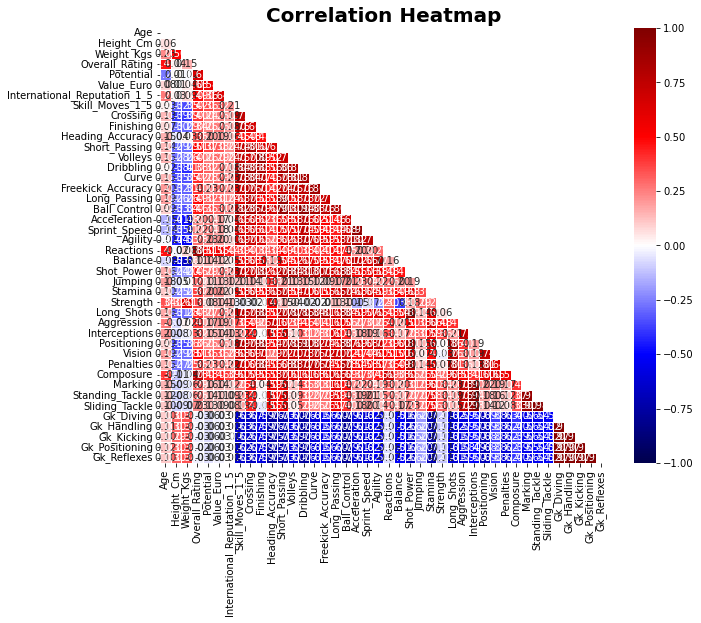

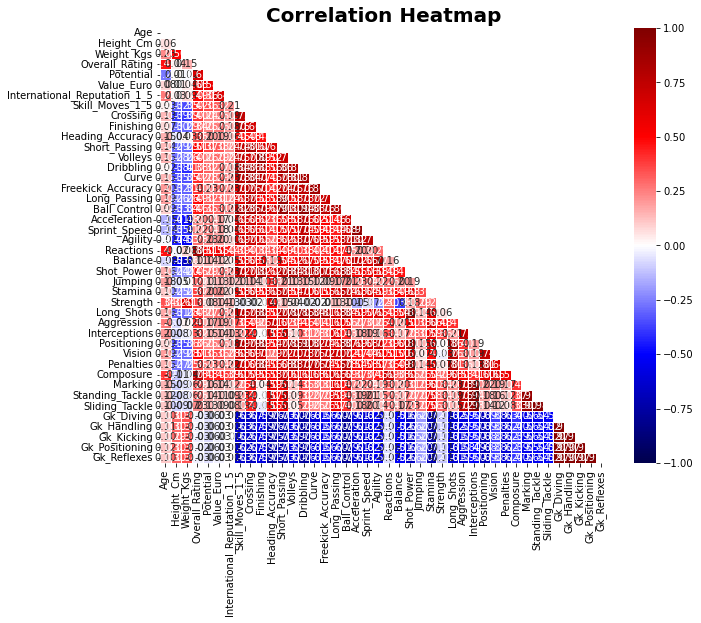

In [13]:
corr_matrix = df.corr()
fig = plt.figure(figsize=[10,8])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
plt.savefig('heatmap2.png',transparent=True, bbox_inches='tight')

In [14]:
prep_df1 = prep_df.copy()

In [15]:
prep_df1 = prep_df1[['Overall_Rating', 'Potential', 'Crossing', 'Finishing',
          'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick_Accuracy', 'Long_Passing',
          'Ball_Control','Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance','Shot_Power',
          'Jumping', 'Stamina', 'Strength', 'Long_Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
          'Penalties', 'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle', 'Gk_Diving', 'Gk_Handling',
          'Gk_Kicking', 'Gk_Positioning', 'Gk_Reflexes']].astype(float)

In [16]:
prep_df1['Value_Euro'] = np.log(df['Value_Euro'])

In [17]:
# applying the log fucntion to Value_Euro to normalize them. More detail can be found on the READ.ME
prep_df1 = prep_df1.rename(columns={'Value_Euro':'Log Value_Euro'})

In [18]:
# adding back player age
prep_df2 = prep_df1.join(age_df, how='inner')
prep_df2

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age
Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,18.520526,31
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,18.056837,27
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,63.0,67.0,67.0,5.0,6.0,2.0,4.0,3.0,18.105970,25
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,17.942645,27
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,91.0,88.0,87.0,7.0,11.0,7.0,13.0,5.0,17.909855,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,67.0,70.0,57.0,61.0,60.0,66.0,37.0,64.0,53.0,47.0,...,40.0,20.0,18.0,15.0,11.0,15.0,12.0,7.0,13.790193,25
239762,59.0,67.0,50.0,19.0,53.0,55.0,31.0,52.0,26.0,28.0,...,53.0,64.0,60.0,15.0,7.0,7.0,15.0,8.0,12.154779,23
235155,59.0,67.0,11.0,9.0,13.0,26.0,9.0,12.0,13.0,12.0,...,9.0,12.0,13.0,63.0,57.0,50.0,58.0,63.0,12.043554,22


,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age
Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,18.520526,31
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,18.056837,27
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,63.0,67.0,67.0,5.0,6.0,2.0,4.0,3.0,18.105970,25
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,17.942645,27
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,91.0,88.0,87.0,7.0,11.0,7.0,13.0,5.0,17.909855,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,67.0,70.0,57.0,61.0,60.0,66.0,37.0,64.0,53.0,47.0,...,40.0,20.0,18.0,15.0,11.0,15.0,12.0,7.0,13.790193,25
239762,59.0,67.0,50.0,19.0,53.0,55.0,31.0,52.0,26.0,28.0,...,53.0,64.0,60.0,15.0,7.0,7.0,15.0,8.0,12.154779,23
235155,59.0,67.0,11.0,9.0,13.0,26.0,9.0,12.0,13.0,12.0,...,9.0,12.0,13.0,63.0,57.0,50.0,58.0,63.0,12.043554,22


In [20]:
# fidning the r-squared for the data set base model
y, X = patsy.dmatrices("Q('Log Value_Euro') ~ Age + Q('Dribbling') + Reactions + Sliding_Tackle + Gk_Kicking + Gk_Handling + Gk_Diving + Composure + Short_Passing + Long_Passing + Overall_Rating + Potential + Finishing+Standing_Tackle + Heading_Accuracy + Gk_Positioning + Marking + Volleys +Strength + Gk_Kicking + Gk_Diving + Gk_Handling + Curve +Acceleration+Sprint_Speed + Agility + Balance + Freekick_Accuracy + Interceptions + Jumping + Aggression + Shot_Power+ Vision + Ball_Control+ Positioning + Gk_Reflexes", data=prep_df2, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Q('Log Value_Euro')   R-squared:                       0.971
Model:                             OLS   Adj. R-squared:                  0.971
Method:                  Least Squares   F-statistic:                 1.784e+04
Date:                 Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                         19:49:13   Log-Likelihood:                 93.121
No. Observations:                17699   AIC:                            -118.2
Df Residuals:                    17665   BIC:                             146.3
Df Model:                           33                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8135      0.039     46.988      0.000       1.738       1.889
Age                  -0.0978      0.001   -115.503      0.000      -0.099      -0.096
Q('Dribbling')       -0.0007      0.000     -1.708      0.088      -0.001    9.62e-05
Reactions             0.0019      0.000      4.549      0.000       0.001       0.003
Sliding_Tackle       -0.0018      0.000     -4.441      0.000      -0.003      -0.001
Gk_Kicking           -0.0010      0.001     -1.875      0.061      -0.002    4.38e-05
Gk_Handling          -0.0017      0.001     -2.997      0.003      -0.003      -0.001
Gk_Diving             0.0014      0.001      2.534      0.011       0.000       0.002
Composure            -0.0006      0.000     -1.835      0.067      -0.001    3.79e-05
Short_Passing         0.0002      0.000      0.423      0.672      -0.001       0.001
Long_Passing          0.0008      0.000      2.548      0.011       0.000       0.001
Overall_Rating        0.2186      0.001    231.797      0.000       0.217       0.220
Potential            -0.0033      0.001     -4.686      0.000      -0.005      -0.002
Finishing             0.0013      0.000      4.601      0.000       0.001       0.002
Standing_Tackle       0.0003      0.000      0.712      0.476      -0.001       0.001
Heading_Accuracy      0.0006      0.000      2.359      0.018       0.000       0.001
Gk_Positioning       -0.0026      0.001     -4.782      0.000      -0.004      -0.002
Marking              -0.0013      0.000     -5.194      0.000      -0.002      -0.001
Volleys               0.0015      0.000      5.588      0.000       0.001       0.002
Strength          -1.474e-05      0.000     -0.064      0.949      -0.000       0.000
Curve                -0.0005      0.000     -1.923      0.054      -0.001    9.35e-06
Acceleration       1.325e-05      0.000      0.036      0.972      -0.001       0.001
Sprint_Speed      -7.498e-05      0.000     -0.219      0.827      -0.001       0.001
Agility           -4.244e-05      0.000     -0.156      0.876      -0.001       0.000
Balance              -0.0003      0.000     -1.208      0.227      -0.001       0.000
Freekick_Accuracy     0.0010      0.000      4.305      0.000       0.001       0.001
Interceptions      4.854e-05      0.000      0.163      0.870      -0.001       0.001
Jumping           -5.566e-05      0.000     -0.289      0.773      -0.000       0.000
Aggression            0.0004      0.000      1.968      0.049    1.52e-06       0.001
Shot_Power            0.0004      0.000      1.418      0.156      -0.000       0.001
Vision                0.0013      0.000      4.740      0.000       0.001       0.002
Ball_Control         -0.0024      0.000     -4.846      0.000      -0.003      -0.001
Positioning           0.0010      0.000      3.361      0.001 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Q('Log Value_Euro')   R-squared:                       0.971
Model:                             OLS   Adj. R-squared:                  0.971
Method:                  Least Squares   F-statistic:                 1.784e+04
Date:                 Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                         19:49:13   Log-Likelihood:                 93.121
No. Observations:                17699   AIC:                            -118.2
Df Residuals:                    17665   BIC:                             146.3
Df Model:                           33                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8135      0.039     46.988      0.000       1.738       1.889
Age                  -0.0978      0.001   -115.503      0.000      -0.099      -0.096
Q('Dribbling')       -0.0007      0.000     -1.708      0.088      -0.001    9.62e-05
Reactions             0.0019      0.000      4.549      0.000       0.001       0.003
Sliding_Tackle       -0.0018      0.000     -4.441      0.000      -0.003      -0.001
Gk_Kicking           -0.0010      0.001     -1.875      0.061      -0.002    4.38e-05
Gk_Handling          -0.0017      0.001     -2.997      0.003      -0.003      -0.001
Gk_Diving             0.0014      0.001      2.534      0.011       0.000       0.002
Composure            -0.0006      0.000     -1.835      0.067      -0.001    3.79e-05
Short_Passing         0.0002      0.000      0.423      0.672      -0.001       0.001
Long_Passing          0.0008      0.000      2.548      0.011       0.000       0.001
Overall_Rating        0.2186      0.001    231.797      0.000       0.217       0.220
Potential            -0.0033      0.001     -4.686      0.000      -0.005      -0.002
Finishing             0.0013      0.000      4.601      0.000       0.001       0.002
Standing_Tackle       0.0003      0.000      0.712      0.476      -0.001       0.001
Heading_Accuracy      0.0006      0.000      2.359      0.018       0.000       0.001
Gk_Positioning       -0.0026      0.001     -4.782      0.000      -0.004      -0.002
Marking              -0.0013      0.000     -5.194      0.000      -0.002      -0.001
Volleys               0.0015      0.000      5.588      0.000       0.001       0.002
Strength          -1.474e-05      0.000     -0.064      0.949      -0.000       0.000
Curve                -0.0005      0.000     -1.923      0.054      -0.001    9.35e-06
Acceleration       1.325e-05      0.000      0.036      0.972      -0.001       0.001
Sprint_Speed      -7.498e-05      0.000     -0.219      0.827      -0.001       0.001
Agility           -4.244e-05      0.000     -0.156      0.876      -0.001       0.000
Balance              -0.0003      0.000     -1.208      0.227      -0.001       0.000
Freekick_Accuracy     0.0010      0.000      4.305      0.000       0.001       0.001
Interceptions      4.854e-05      0.000      0.163      0.870      -0.001       0.001
Jumping           -5.566e-05      0.000     -0.289      0.773      -0.000       0.000
Aggression            0.0004      0.000      1.968      0.049    1.52e-06       0.001
Shot_Power            0.0004      0.000      1.418      0.156      -0.000       0.001
Vision                0.0013      0.000      4.740      0.000       0.001       0.002
Ball_Control         -0.0024      0.000     -4.846      0.000      -0.003      -0.001
Positioning           0.0010      0.000      3.361      0.001 

In [21]:
#making linear regession using seaborn
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    print(res)    
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")

In [22]:
prep_df3 = prep_df2.copy()


In [23]:
prep_df3

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age
Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,18.520526,31
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,18.056837,27
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,63.0,67.0,67.0,5.0,6.0,2.0,4.0,3.0,18.105970,25
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,17.942645,27
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,91.0,88.0,87.0,7.0,11.0,7.0,13.0,5.0,17.909855,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,67.0,70.0,57.0,61.0,60.0,66.0,37.0,64.0,53.0,47.0,...,40.0,20.0,18.0,15.0,11.0,15.0,12.0,7.0,13.790193,25
239762,59.0,67.0,50.0,19.0,53.0,55.0,31.0,52.0,26.0,28.0,...,53.0,64.0,60.0,15.0,7.0,7.0,15.0,8.0,12.154779,23
235155,59.0,67.0,11.0,9.0,13.0,26.0,9.0,12.0,13.0,12.0,...,9.0,12.0,13.0,63.0,57.0,50.0,58.0,63.0,12.043554,22


,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age
Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,18.520526,31
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,18.056837,27
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,63.0,67.0,67.0,5.0,6.0,2.0,4.0,3.0,18.105970,25
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,17.942645,27
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,91.0,88.0,87.0,7.0,11.0,7.0,13.0,5.0,17.909855,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,67.0,70.0,57.0,61.0,60.0,66.0,37.0,64.0,53.0,47.0,...,40.0,20.0,18.0,15.0,11.0,15.0,12.0,7.0,13.790193,25
239762,59.0,67.0,50.0,19.0,53.0,55.0,31.0,52.0,26.0,28.0,...,53.0,64.0,60.0,15.0,7.0,7.0,15.0,8.0,12.154779,23
235155,59.0,67.0,11.0,9.0,13.0,26.0,9.0,12.0,13.0,12.0,...,9.0,12.0,13.0,63.0,57.0,50.0,58.0,63.0,12.043554,22


In [26]:
prep_df4 = prep_df3.reset_index(inplace=True)
prep_df4 = prep_df3.rename(columns = {'index':'Id'})

In [112]:
y = prep_df3['Log Value_Euro']
X = prep_df3.drop(['Id','Log Value_Euro','index'],axis=1)

0       -0.831361
1       -0.374897
2       -0.469884
3       -0.417441
4       -0.158716
           ...   
17694   -0.159485
17695   -0.053345
17696   -0.158931
17697   -0.065507
17698   -0.057318
Name: Log Value_Euro, Length: 17699, dtype: float64
0       -0.831361
1       -0.374897
2       -0.469884
3       -0.417441
4       -0.158716
           ...   
17694   -0.159485
17695   -0.053345
17696   -0.158931
17697   -0.065507
17698   -0.057318
Name: Log Value_Euro, Length: 17699, dtype: float64


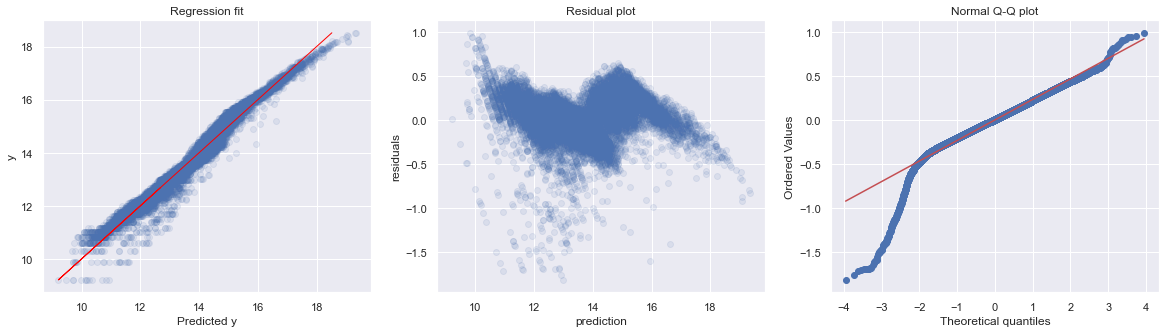

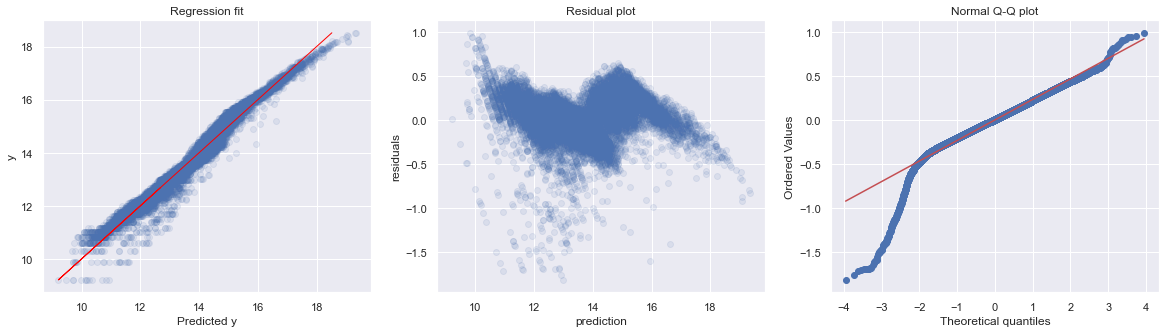

In [114]:
sns.set(style='darkgrid')
diagnostic_plot(X, y)

In [115]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [116]:
selected_columns = ['Age','Overall_Rating', 'Potential', 'Crossing', 'Finishing',
          'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick_Accuracy', 'Long_Passing',
          'Ball_Control','Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance','Shot_Power',
          'Jumping', 'Stamina', 'Strength', 'Long_Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
          'Penalties', 'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle', 'Gk_Diving', 'Gk_Handling',
          'Gk_Kicking', 'Gk_Positioning', 'Gk_Reflexes']


In [117]:
# Testing with Lasso
lasso_model = Lasso(alpha = 0.1)    
lasso_model.fit(X_train_val[selected_columns], y_train_val)
list(zip(selected_columns, lasso_model.coef_))
## doing feature selection with Lasso

[('Age', -0.07927294993328787),
 ('Overall_Rating', 0.2007967060500709),
 ('Potential', 0.00839789984865465),
 ('Crossing', -0.0),
 ('Finishing', 0.002223417328995711),
 ('Heading_Accuracy', 0.0006103565228057904),
 ('Short_Passing', 0.0003384973717230711),
 ('Volleys', 0.001423059573054307),
 ('Dribbling', 6.408840074081485e-05),
 ('Curve', 0.0),
 ('Freekick_Accuracy', 0.0),
 ('Long_Passing', 0.0),
 ('Ball_Control', 0.0),
 ('Acceleration', 0.0),
 ('Sprint_Speed', 0.00014428220165109233),
 ('Agility', 0.0),
 ('Reactions', 0.0008198311731936678),
 ('Balance', -0.0),
 ('Shot_Power', 0.0007467011820166313),
 ('Jumping', -0.0),
 ('Stamina', 0.0009885024526467565),
 ('Strength', 0.0),
 ('Long_Shots', 0.0),
 ('Aggression', 0.0),
 ('Interceptions', -0.0),
 ('Positioning', 0.0007940686858212745),
 ('Vision', 0.00024939078589544155),
 ('Penalties', 0.0),
 ('Composure', 0.0),
 ('Marking', -8.670030964207279e-05),
 ('Standing_Tackle', -0.0),
 ('Sliding_Tackle', -0.0009269559770852925),
 ('Gk_Divi

[('Age', -0.07927294993328787),
 ('Overall_Rating', 0.2007967060500709),
 ('Potential', 0.00839789984865465),
 ('Crossing', -0.0),
 ('Finishing', 0.002223417328995711),
 ('Heading_Accuracy', 0.0006103565228057904),
 ('Short_Passing', 0.0003384973717230711),
 ('Volleys', 0.001423059573054307),
 ('Dribbling', 6.408840074081485e-05),
 ('Curve', 0.0),
 ('Freekick_Accuracy', 0.0),
 ('Long_Passing', 0.0),
 ('Ball_Control', 0.0),
 ('Acceleration', 0.0),
 ('Sprint_Speed', 0.00014428220165109233),
 ('Agility', 0.0),
 ('Reactions', 0.0008198311731936678),
 ('Balance', -0.0),
 ('Shot_Power', 0.0007467011820166313),
 ('Jumping', -0.0),
 ('Stamina', 0.0009885024526467565),
 ('Strength', 0.0),
 ('Long_Shots', 0.0),
 ('Aggression', 0.0),
 ('Interceptions', -0.0),
 ('Positioning', 0.0007940686858212745),
 ('Vision', 0.00024939078589544155),
 ('Penalties', 0.0),
 ('Composure', 0.0),
 ('Marking', -8.670030964207279e-05),
 ('Standing_Tackle', -0.0),
 ('Sliding_Tackle', -0.0009269559770852925),
 ('Gk_Divi

In [118]:
std = StandardScaler()
std.fit(X_train_val.values)
X_tr = std.transform(X_train_val.values)
X_te = std.transform(X_test.values)
## Scaling x values for lasso,ridge,elastic net

In [119]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)


In [120]:
alphavec = 10**np.linspace(-15,4,400)
lasso_model = LassoCV(alphas = alphavec, cv=kf)
lasso_model.fit(X_tr, y_train_val)
lasso_model.alpha_
## finding alpha value that gives lowest MAE for Lasso CV

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.011031465061365, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.343998961359944, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.531343703473226, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.93464001252653, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.595554292003783, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.636367977360976, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.92436587809857, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.177807873224765, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.614379225230323, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

0.00029935772947204905

0.00029935772947204905

In [121]:
# testing with Ridged
alphavec = 10**np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = alphavec, cv=kf)
ridge_model.fit(X_tr, y_train_val)
ridge_model.alpha_
## finding alpha value that gives lowest MAE for Ridge CV

1.0234114021054528

1.0234114021054528

In [122]:
list(zip(X_train_val.columns, ridge_model.coef_))
# finding coefficients for optimum alpha value for Ridge

[('Overall_Rating', 1.5318475860506973),
 ('Potential', -0.023179730905342574),
 ('Crossing', -0.036918490981846866),
 ('Finishing', 0.017698246014549206),
 ('Heading_Accuracy', 0.006979816997582898),
 ('Short_Passing', 0.0070180351396913095),
 ('Volleys', 0.027691646510754512),
 ('Dribbling', 0.004077047913329547),
 ('Curve', 3.99353663123134e-05),
 ('Freekick_Accuracy', 0.018838136946728402),
 ('Long_Passing', 0.012808541014290142),
 ('Ball_Control', -0.037634250246298455),
 ('Acceleration', 0.00315153021289229),
 ('Sprint_Speed', -0.0032734248499231666),
 ('Agility', -0.0007384438980658838),
 ('Reactions', 0.017348742783555207),
 ('Balance', -0.007782902574751114),
 ('Shot_Power', 0.00959358109687561),
 ('Jumping', -0.003224882326289722),
 ('Stamina', 0.01925165085950002),
 ('Strength', -0.00427219393040417),
 ('Long_Shots', -0.009368109623339883),
 ('Aggression', 0.003817294688228336),
 ('Interceptions', -0.0012355448849838775),
 ('Positioning', 0.025598669868510216),
 ('Vision', 0

[('Overall_Rating', 1.5318475860506973),
 ('Potential', -0.023179730905342574),
 ('Crossing', -0.036918490981846866),
 ('Finishing', 0.017698246014549206),
 ('Heading_Accuracy', 0.006979816997582898),
 ('Short_Passing', 0.0070180351396913095),
 ('Volleys', 0.027691646510754512),
 ('Dribbling', 0.004077047913329547),
 ('Curve', 3.99353663123134e-05),
 ('Freekick_Accuracy', 0.018838136946728402),
 ('Long_Passing', 0.012808541014290142),
 ('Ball_Control', -0.037634250246298455),
 ('Acceleration', 0.00315153021289229),
 ('Sprint_Speed', -0.0032734248499231666),
 ('Agility', -0.0007384438980658838),
 ('Reactions', 0.017348742783555207),
 ('Balance', -0.007782902574751114),
 ('Shot_Power', 0.00959358109687561),
 ('Jumping', -0.003224882326289722),
 ('Stamina', 0.01925165085950002),
 ('Strength', -0.00427219393040417),
 ('Long_Shots', -0.009368109623339883),
 ('Aggression', 0.003817294688228336),
 ('Interceptions', -0.0012355448849838775),
 ('Positioning', 0.025598669868510216),
 ('Vision', 0

In [123]:
ridge_model_final = Ridge(alpha = 0.9329304026284686) 
Mean_R2_Ridge_CV = np.mean(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Ridge_CV
# scoring the Ridge model based on CV

0.9705647928804637

0.9705647928804637

In [124]:
Std_R2_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='r2'))
Std_R2_Ridge_CV

0.0011756051365164144

0.0011756051365164144

In [125]:
Mean_MAE_Ridge_CV = -np.mean(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Mean_MAE_Ridge_CV
# scoring the Ridge model based on CV

0.17878320948648074

0.17878320948648074

In [126]:
Std_MAE_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Std_MAE_Ridge_CV

0.0020832546383858326

0.0020832546383858326

In [127]:
alphavec = 10**np.linspace(-22,-17,300)
elastic_model = ElasticNetCV(alphas = alphavec, cv=kf)
elastic_model.fit(X_tr, y_train_val)
elastic_model.alpha_
## finding alpha value that gives lowest MAE for ElasticNet CV

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.24811401354054, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327.2894508216344, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.63031087772526, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.24811401354054, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327.2894508216344, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.63031087772526, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.6449317451741, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.66693239727414, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.62759042061276, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.6449317451741, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.66693239727414, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.62759042061276, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.197199856768, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.1991179902753, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.1726842009376, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.197199856768, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.1991179902753, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.1726842009376, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.23114752461436, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.23832475151806, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.23633689109954, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.23114752461436, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.23832475151806, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.23633689109954, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.24688951702626, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.24634058418604, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.2471450559622, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.24688951702626, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.24634058418604, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.2471450559622, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.24788445668236, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.24773761895347, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.24792295671705, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.24788445668236, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.24773761895347, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.24792295671705, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0714815332482, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.57360465832784, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329.32617148586144, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0714815332482, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.57360465832784, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329.32617148586144, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.72044292446355, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.65578147398435, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.67147449178987, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.72044292446355, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.65578147398435, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.67147449178987, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0151778922857, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0082744251341, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.98026994213615, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0151778922857, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0082744251341, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.98026994213615, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0610372322177, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.06227020402713, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0626184640928, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0610372322177, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.06227020402713, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0626184640928, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0698927091071, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0703372704853, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.06958856373154, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0698927091071, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0703372704853, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.06958856373154, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0712882270159, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0711664395954, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.071320159005, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0712882270159, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0711664395954, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.071320159005, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.3019548792852, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322.86099673157673, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.9688599092485, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.3019548792852, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322.86099673157673, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.9688599092485, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.33247635410174, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.15598539682145, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.2791639523442, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.33247635410174, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.15598539682145, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.2791639523442, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.4745662715406, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.50513664366645, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.50720385376655, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.4745662715406, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.50513664366645, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.50720385376655, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.5532884608409, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.54791646706883, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.5524717980108, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.5532884608409, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.54791646706883, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.5524717980108, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.5589451195225, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.55790436814607, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.55816633862537, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.5589451195225, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.55790436814607, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.55816633862537, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.55956244253304, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.559732426083, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.559676116478, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to i

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.55956244253304, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.559732426083, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.559676116478, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to i

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3843121237051, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325.7357615744164, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327.9196282143097, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3843121237051, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325.7357615744164, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327.9196282143097, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.57219636036797, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.86324890897527, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.08343830700056, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.57219636036797, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.86324890897527, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.08343830700056, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.20001828701743, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.32172341842215, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.28192923880556, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.20001828701743, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.32172341842215, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.28192923880556, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.37187648438135, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.35638257179386, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3641572221174, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.37187648438135, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.35638257179386, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3641572221174, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3813859399428, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3811439135772, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.38187501631506, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3813859399428, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3811439135772, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.38187501631506, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3838953008912, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3838704953554, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.38401095660555, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3838953008912, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3838704953554, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.38401095660555, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3842270473538, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.38420826067676, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.3842124696615, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329.4958365887263, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.4911525432379, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.6450231749089, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329.4958365887263, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.4911525432379, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.6450231749089, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.890943848065, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.2827722605445, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.30746163192293, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.890943848065, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.2827722605445, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.30746163192293, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.85315226283876, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.87259200765914, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.7986047067134, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.85315226283876, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.87259200765914, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.7986047067134, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.910993639109, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9083415515806, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9157023387708, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to i

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.910993639109, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9083415515806, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9157023387708, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to i

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.93280847511056, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.931146027519, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9341488584358, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.93280847511056, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.931146027519, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9341488584358, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9372988892245, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9371088534238, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9368136762771, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9372988892245, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9371088534238, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9368136762771, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.93750885744834, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9374745647304, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.9375514728562, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.144e+02, tolerance: 2.841e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.144e+02, tolerance: 2.841e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using 

9.771619672696202e-21

9.771619672696202e-21

In [128]:
lm = LinearRegression()

Mean_R2_Linear_CV = np.mean(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Linear_CV 
# scoring the LR model based on CV

0.9705646299754653

0.9705646299754653

In [129]:
c = lm.fit(X_train_val, y_train_val)

In [130]:
y_pred=c.predict(X_test)
print(y_pred)

[14.23763042 11.47656063 12.41656355 ... 13.89286674 13.90234892
 12.47005725]
[14.23763042 11.47656063 12.41656355 ... 13.89286674 13.90234892
 12.47005725]


In [131]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.97176875031455
0.97176875031455


In [132]:
test = pd.DataFrame(y_pred)

In [133]:
test

,0
0,14.237630
1,11.476561
2,12.416564
3,14.608009
4,13.907492
...,...
3535,14.902284
3536,13.440592
3537,13.892867
3538,13.902349


,0
0,14.237630
1,11.476561
2,12.416564
3,14.608009
4,13.907492
...,...
3535,14.902284
3536,13.440592
3537,13.892867
3538,13.902349


In [136]:
test1 = prep_df4.join(test,how='inner' )

In [137]:
test1

,Id,Id,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,...,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age,0
0,0,158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,18.520526,31,14.237630
1,1,190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,...,57.0,22.0,9.0,14.0,7.0,7.0,6.0,18.056837,27,11.476561
2,2,195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,...,67.0,67.0,5.0,6.0,2.0,4.0,3.0,18.105970,25,12.416564
3,3,198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,...,24.0,22.0,8.0,4.0,14.0,9.0,10.0,17.942645,27,14.608009
4,4,201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,...,88.0,87.0,7.0,11.0,7.0,13.0,5.0,17.909855,27,13.907492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,3535,242019,62.0,71.0,40.0,64.0,59.0,57.0,50.0,67.0,...,16.0,21.0,9.0,13.0,11.0,13.0,11.0,13.071070,22,14.902284
3536,3536,241251,62.0,62.0,29.0,23.0,64.0,34.0,29.0,28.0,...,66.0,62.0,9.0,9.0,10.0,8.0,6.0,12.429216,29,13.440592
3537,3537,189282,62.0,62.0,49.0,61.0,57.0,55.0,51.0,57.0,...,30.0,26.0,6.0,15.0,13.0,13.0,7.0,12.691580,29,13.892867
3538,3538,242018,62.0,62.0,65.0,58.0,34.0,57.0,40.0,63.0,...,21.0,20.0,13.0,12.0,7.0,8.0,12.0,12.691580,27,13.902349


,Id,Id,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,...,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age,0
0,0,158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,18.520526,31,14.237630
1,1,190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,...,57.0,22.0,9.0,14.0,7.0,7.0,6.0,18.056837,27,11.476561
2,2,195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,...,67.0,67.0,5.0,6.0,2.0,4.0,3.0,18.105970,25,12.416564
3,3,198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,...,24.0,22.0,8.0,4.0,14.0,9.0,10.0,17.942645,27,14.608009
4,4,201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,...,88.0,87.0,7.0,11.0,7.0,13.0,5.0,17.909855,27,13.907492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,3535,242019,62.0,71.0,40.0,64.0,59.0,57.0,50.0,67.0,...,16.0,21.0,9.0,13.0,11.0,13.0,11.0,13.071070,22,14.902284
3536,3536,241251,62.0,62.0,29.0,23.0,64.0,34.0,29.0,28.0,...,66.0,62.0,9.0,9.0,10.0,8.0,6.0,12.429216,29,13.440592
3537,3537,189282,62.0,62.0,49.0,61.0,57.0,55.0,51.0,57.0,...,30.0,26.0,6.0,15.0,13.0,13.0,7.0,12.691580,29,13.892867
3538,3538,242018,62.0,62.0,65.0,58.0,34.0,57.0,40.0,63.0,...,21.0,20.0,13.0,12.0,7.0,8.0,12.0,12.691580,27,13.902349


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.21888
Feature: 2, Score: -0.00388
Feature: 3, Score: -0.00200
Feature: 4, Score: 0.00090
Feature: 5, Score: 0.00039
Feature: 6, Score: 0.00048
Feature: 7, Score: 0.00154
Feature: 8, Score: 0.00022
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00107
Feature: 11, Score: 0.00082
Feature: 12, Score: -0.00225
Feature: 13, Score: 0.00019
Feature: 14, Score: -0.00022
Feature: 15, Score: -0.00006
Feature: 16, Score: 0.00187
Feature: 17, Score: -0.00054
Feature: 18, Score: 0.00056
Feature: 19, Score: -0.00027
Feature: 20, Score: 0.00119
Feature: 21, Score: -0.00034
Feature: 22, Score: -0.00050
Feature: 23, Score: 0.00022
Feature: 24, Score: -0.00007
Feature: 25, Score: 0.00130
Feature: 26, Score: 0.00112
Feature: 27, Score: 0.00038
Feature: 28, Score: -0.00057
Feature: 29, Score: -0.00119
Feature: 30, Score: 0.00043
Feature: 31, Score: -0.00180
Feature: 32, Score: 0.00192
Feature: 33, Score: -0.00210
Feature: 34, Score: -0.00084
Feature: 35, Sc

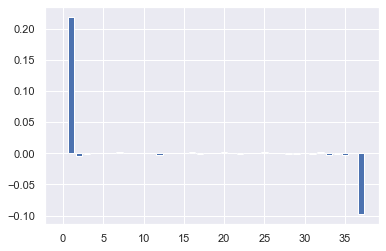

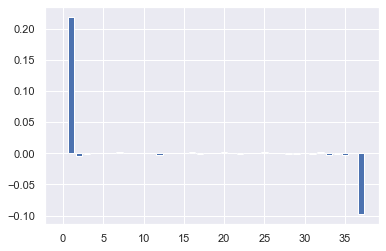

In [110]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X = 
y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()